In [25]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [12]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [13]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [14]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [27]:
# Import the API key.
from config import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | olga
Processing Record 2 of Set 1 | ribeira grande
Processing Record 3 of Set 1 | bengkulu
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | xuddur
Processing Record 6 of Set 1 | port hardy
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | torbay
Processing Record 9 of Set 1 | macaboboni
City not found. Skipping...
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | koutiala
Processing Record 13 of Set 1 | iqaluit
Processing Record 14 of Set 1 | kerema
Processing Record 15 of Set 1 | pangnirtung
Processing Record 16 of Set 1 | novobirilyussy
Processing Record 17 of Set 1 | kavieng
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | lebu
Processing Record 20 of Set 1 | klaksvik
Processing Record 21 of Set 1 | havelock
Processing Record 22 of Set 1 | albany
Processing Rec

Processing Record 42 of Set 4 | kieta
Processing Record 43 of Set 4 | roald
Processing Record 44 of Set 4 | atyrau
Processing Record 45 of Set 4 | nampula
Processing Record 46 of Set 4 | jalu
Processing Record 47 of Set 4 | chokurdakh
Processing Record 48 of Set 4 | kutum
Processing Record 49 of Set 4 | east london
Processing Record 50 of Set 4 | cabo san lucas
Processing Record 1 of Set 5 | bluff
Processing Record 2 of Set 5 | hambantota
Processing Record 3 of Set 5 | la ronge
Processing Record 4 of Set 5 | bethel
Processing Record 5 of Set 5 | nome
Processing Record 6 of Set 5 | arona
Processing Record 7 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 8 of Set 5 | meiganga
Processing Record 9 of Set 5 | clyde river
Processing Record 10 of Set 5 | kashi
Processing Record 11 of Set 5 | meyungs
City not found. Skipping...
Processing Record 12 of Set 5 | severodvinsk
Processing Record 13 of Set 5 | prince rupert
Processing Record 14 of Set 5 | tadine
Processing Record 1

Processing Record 31 of Set 8 | finnsnes
Processing Record 32 of Set 8 | cockburn town
Processing Record 33 of Set 8 | oktyabrskoye
Processing Record 34 of Set 8 | ust-tsilma
Processing Record 35 of Set 8 | husavik
Processing Record 36 of Set 8 | muroto
Processing Record 37 of Set 8 | fukue
Processing Record 38 of Set 8 | mar del plata
Processing Record 39 of Set 8 | shirgaon
Processing Record 40 of Set 8 | chapais
Processing Record 41 of Set 8 | trairi
Processing Record 42 of Set 8 | port-de-paix
City not found. Skipping...
Processing Record 43 of Set 8 | mwaro
Processing Record 44 of Set 8 | gat
Processing Record 45 of Set 8 | namatanai
Processing Record 46 of Set 8 | almaznyy
Processing Record 47 of Set 8 | vodnyy
Processing Record 48 of Set 8 | bargarh
Processing Record 49 of Set 8 | lithgow
Processing Record 50 of Set 8 | yoichi
Processing Record 1 of Set 9 | kangaatsiaq
Processing Record 2 of Set 9 | nouadhibou
Processing Record 3 of Set 9 | pandan
Processing Record 4 of Set 9 | 

Processing Record 21 of Set 12 | mfou
Processing Record 22 of Set 12 | sarangani
Processing Record 23 of Set 12 | barbar
City not found. Skipping...
Processing Record 24 of Set 12 | grand river south east
City not found. Skipping...
Processing Record 25 of Set 12 | brownwood
Processing Record 26 of Set 12 | avera
Processing Record 27 of Set 12 | tazovskiy
Processing Record 28 of Set 12 | borba
Processing Record 29 of Set 12 | acarau
Processing Record 30 of Set 12 | fairbanks
Processing Record 31 of Set 12 | sorong
Processing Record 32 of Set 12 | egvekinot
Processing Record 33 of Set 12 | villazon
Processing Record 34 of Set 12 | rock sound
Processing Record 35 of Set 12 | viedma
Processing Record 36 of Set 12 | lhuntshi
City not found. Skipping...
Processing Record 37 of Set 12 | lompoc
Processing Record 38 of Set 12 | jacqueville
Processing Record 39 of Set 12 | belmonte
Processing Record 40 of Set 12 | moose factory
Processing Record 41 of Set 12 | jimo
Processing Record 42 of Set 1

In [28]:
len(city_data)

559

In [29]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Olga,43.7444,135.2892,8.01,55,7,13.47,RU,2022-01-29 17:41:02
1,Ribeira Grande,38.5167,-28.7000,63.00,59,40,6.91,PT,2022-01-29 17:41:02
2,Bengkulu,-3.8004,102.2655,76.30,90,95,3.38,ID,2022-01-29 17:40:29
3,Yellowknife,62.4560,-114.3525,-6.59,92,100,4.61,CA,2022-01-29 17:41:01
4,Xuddur,4.1213,43.8894,79.47,26,85,10.16,SO,2022-01-29 17:41:03
5,Port Hardy,50.6996,-127.4199,45.75,81,100,19.57,CA,2022-01-29 17:41:03
6,Bredasdorp,-34.5322,20.0403,70.29,68,0,16.11,ZA,2022-01-29 17:41:03
7,Torbay,47.6666,-52.7314,35.28,88,100,18.41,CA,2022-01-29 17:41:04
8,Mataura,-46.1927,168.8643,53.65,94,99,1.63,NZ,2022-01-29 17:41:04
9,Jamestown,42.0970,-79.2353,17.29,48,0,7.00,US,2022-01-29 17:38:41


In [30]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Olga,RU,2022-01-29 17:41:02,43.7444,135.2892,8.01,55,7,13.47
1,Ribeira Grande,PT,2022-01-29 17:41:02,38.5167,-28.7000,63.00,59,40,6.91
2,Bengkulu,ID,2022-01-29 17:40:29,-3.8004,102.2655,76.30,90,95,3.38
3,Yellowknife,CA,2022-01-29 17:41:01,62.4560,-114.3525,-6.59,92,100,4.61
4,Xuddur,SO,2022-01-29 17:41:03,4.1213,43.8894,79.47,26,85,10.16
...,...,...,...,...,...,...,...,...,...
554,Roseburg,US,2022-01-29 17:52:07,43.2165,-123.3417,57.69,100,100,3.44
555,Dawson Creek,CA,2022-01-29 17:56:27,55.7666,-120.2362,33.76,69,75,8.05
556,Ram Das,IN,2022-01-29 17:56:27,31.9661,74.9047,53.38,63,0,4.09
557,Vanimo,PG,2022-01-29 17:56:28,-2.6741,141.3028,76.91,87,100,5.10


In [32]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# 6.3.1 Lat Vs. Temp

In [33]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

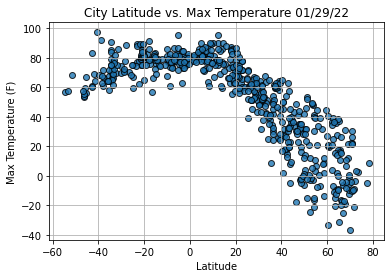

In [34]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

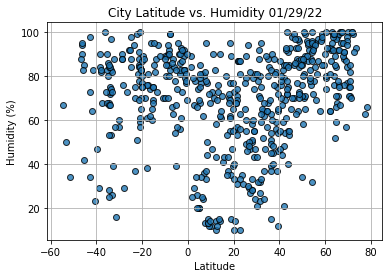

In [35]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

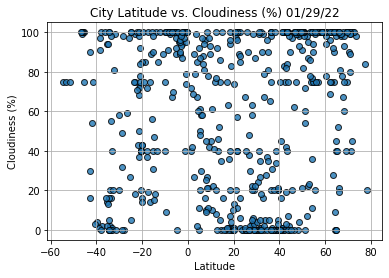

In [36]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

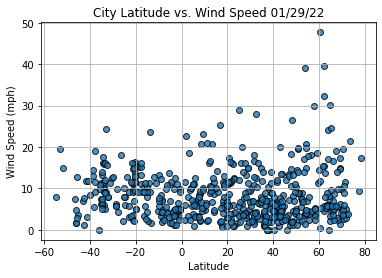

In [37]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()